In [1]:
import math
from operator import itemgetter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib.colors import ListedColormap

from regression import normalEquation, linear, extendMatrix, vectorCost, gradient
from statistics import normalizeFeature

style.use('fivethirtyeight')
np.set_printoptions(precision=4)


In [2]:

df = pd.read_csv("datasets/girls_height.csv", delimiter='\s+',
                 names=["mom", "dad", "girls"])
x1 = df.mom
x2 = df.dad
y = df.girls

Xe = extendMatrix([x1, x2], True)

beta = normalEquation(Xe, y)
print("beta:", beta.tolist())

normalX = np.array(normalizeFeature([x1, x2]))


beta: [23.788808864236053, 0.625265509034452, 0.0012616298318794713]


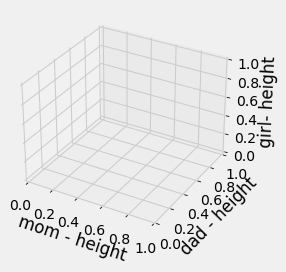

In [3]:

ax = plt.axes(projection='3d')

ax.set_xlabel('mom - height')
ax.set_ylabel('dad - height')
ax.set_zlabel('girl- height')

# Compute X max.
xMin = int(sorted(x1)[0])
xMax = int(sorted(x1)[-1])

# Compute Y min.
zMin = int(sorted(x2)[0])
zMax = int(sorted(x2)[-1])

xx, zz = np.meshgrid(range(xMin, xMax), range(zMin, zMax))
yy = (beta[0] + xx * beta[1] + beta[2] * zz)


In [4]:

# Mesh plot colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

ax.plot_surface(xx, zz, yy, cmap='viridis')
#
ax.scatter(x1, x2, y, alpha=1.0, cmap=cmap_bold, linewidth=0.8)
# Draw lines from point to plane.
for x, z, y_ in zip(x1, x2, y):
    predict = linear(beta, (x, z))
    lineX = [x, x]
    lineY = [z, z]
    lineZ = [predict, y_]
    ax.plot(lineX, lineY, lineZ, linewidth=0.5)

plt.show()


In [5]:

# Test using the linear predict solver.
testX = [[65, 70]]
testY = [65.42]
predict = linear(beta, testX[0])
print("predicted: ", predict, "actual:", testY[0])

# Normalized datasets set and perform linear predict solver.
Xe = extendMatrix(normalX, True)
beta = normalEquation(Xe, y)
predict = linear(beta, [65, 70])
print("Normalized set:\n", normalX, "\nbeta:", beta.tolist())

cost = vectorCost(beta, Xe, y)
print("Normalized Feature set cost {}".format(float(cost)))

costs = []
for j in [1.0 / i for i in range(10, 2000, 100)]:
    for n in range(10, 1000, 10):
        optimized = gradient(Xe, beta, y, j, n)

        combinationCost = vectorCost(optimized, Xe, y)

        # Deal with invalid numbers
        if math.isnan(combinationCost) or math.isinf(combinationCost):
            continue

        costs.append([[n, j], combinationCost])
        print("steps: {}, alpha: {} beta: {} cost : {}".format(
            n, float(j), optimized, float(combinationCost)))

Sortedoptimal = sorted(costs, key=itemgetter(1))
optimal = Sortedoptimal[0]
n, j = optimal[0]
print("optimal cost function {}, using ({}, {})".format(
    float(optimal[1]), n, j))

# Solve

beta = gradient(Xe, beta, y, j, n)
testX = normalizeFeature([[65, 70]])
predict = linear(beta, testX[0])
print("beta {}, expected: {}, predicted: {}".format(
    beta.tolist(), testY[0], float(predict)))


predicted:  64.51938103970699 actual: 65.42
Normalized set:
 [[ 0.4532 -0.2914 -0.2914  1.5701  0.4532 -0.6637  1.1978  0.0809 -0.2914
   0.0809  0.4532  1.1978  0.4532 -1.7806 -1.7806 -1.7806 -0.2914  1.9424
  -0.2914 -0.6637 -1.4083  1.5701 -0.6637  0.4532  0.0809 -0.2914  0.4532
   0.0809 -0.6637 -0.6637  0.0809  0.4532  0.8255  1.0117 -1.036  -0.2914
  -0.6637 -0.2914 -0.6637 -0.8499  0.0809  0.6394  1.7563 -0.4776  1.5701
   0.8255  0.8255  0.8255  0.8255  0.8255 -0.6637 -0.6637 -1.7806 -0.6637
   0.2671  0.4532  1.1978  0.0809  0.0809  0.4532 -1.036   0.4532  0.8255
  -0.6637  0.4532  0.8255 -1.4083 -1.036  -0.4776 -1.4083 -0.2914 -1.4083
  -1.4083 -0.6637 -1.036  -0.2914 -0.2914  0.0809 -0.2914 -2.153   0.0809
  -0.6637 -0.1053 -0.2914  1.9424 -1.7806  1.5701 -1.036   0.0809 -0.2914
  -0.2914  0.4532 -0.6637  0.8255 -1.7806  1.1978  0.8255  0.4532  0.8255
   0.0809 -1.4083 -0.2914  1.1978 -0.2914  0.2671  0.8255  0.8255 -0.8499
  -1.036  -1.036  -0.2914  0.4532  0.0809  0.8255 -